In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
nS = 4
nA = 2

In [45]:
P = np.array(
    [
        # Action 1
        [0.0, 0.8, 0.2, 0.0],
        [0.2, 0.0, 0.0, 0.8],
        [0.8, 0.0, 0.0, 0.2],
        [0.0, 0.0, 0.0, 1.0],
        # Action 2
        [0.0, 0.2, 0.8, 0.0],
        [0.2, 0.0, 0.0, 0.8],
        [0.8, 0.0, 0.0, 0.2],
        [0.0, 0.0, 0.0, 1.0],
    ]
)

In [46]:
Pi = np.array(
    [
        [0.8, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.8, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.2],
    ]
)

In [47]:
PPi = P @ Pi

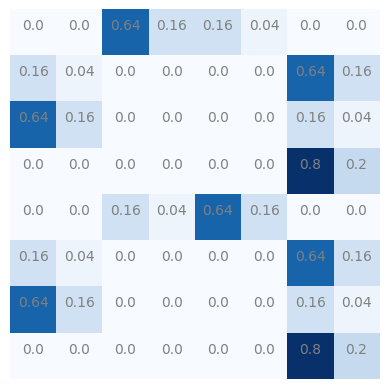

In [48]:
plt.imshow(PPi, cmap='Blues')
for i in range(nS*nA):
    for j in range(nS*nA):
        p = np.around(PPi[i, j], 2)
        plt.text(j, i, p, ha='center', va='bottom', color='gray')
plt.axis('off')
plt.show()

In [49]:
R = np.array([0, 0, 1, 0, 1, 0, 1, 1])

In [50]:
gamma = 0.8

In [51]:
A = np.eye(nS*nA) - gamma * PPi
b = R
Q = np.linalg.inv(A) @ R

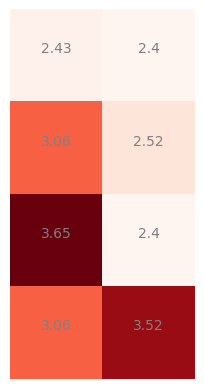

In [52]:
plt.imshow(Q.reshape(nS, nA), cmap='Reds')
for i in range(nS):
    for j in range(nA):
        q = np.around(Q.reshape(nS, nA)[i, j], 2)
        plt.text(j, i, q, ha='center', va='bottom', color='gray')
plt.axis('off')
plt.show()

In [27]:
Q = np.zeros(nS*nA)
Qs = [Q]
for _ in range(40):
    Q = R + gamma * PPi @ Q
    Qs.append(Q)

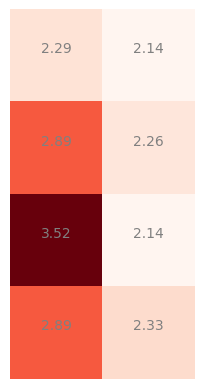

In [28]:
plt.imshow(Q.reshape(nS, nA), cmap='Reds')
for i in range(nS):
    for j in range(nA):
        q = np.around(Q.reshape(nS, nA)[i, j], 2)
        plt.text(j, i, q, ha='center', va='bottom', color='gray')
plt.axis('off')
plt.show()

In [33]:
N = 100000
Gs = []
for _ in range(N):
    G = 0
    s = 0
    a = 0
    for i in range(50):
        r = R[s*nA + a]
        G += (gamma**i) * r
        
        pS = P[s*nA + a, :]
        s = np.random.choice(nS, p=pS)
        
        pA = Pi[s, s*nA: s*nA + nA]
        a = np.random.choice(nA, p=pA)
    Gs.append(G)
Q = sum(Gs) / N
print(f"Estimated Value Function: {np.around(Q, 2)}")

Estimated Value Function: 2.29


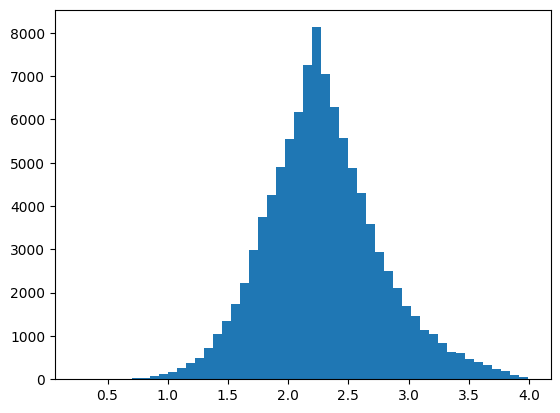

In [34]:
plt.hist(Gs, bins=50);